In [165]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.optimize
from scipy.optimize import curve_fit

In [166]:

a = np.loadtxt('ASTR19_S22_group_project_data.txt', dtype='str')
i=0

datetemp=[]
timetemp=[]
time=[]
height=[]
date=[]

for arr in a: #fix this part
	datetemp.append(int(arr[0]))
	timetemp.append(arr[1])
	height.append(float(arr[2]))

for elem in timetemp:
	splitelem=elem.split(':')
	abstime = (int(splitelem[0])*60+int(splitelem[1]))
	time.append(abstime)


for elem in time:
	date.append(float(datetemp[i]+elem/1440))
	i+=1

#LOADS ALL DATA ^^^^ AND CREATES LISTS date[] AND height[] 

heighterr=0.25 #sets uncertainty error

[ 1.00167751  1.09208392 -0.24552477  2.50913208  1.          1.        ]


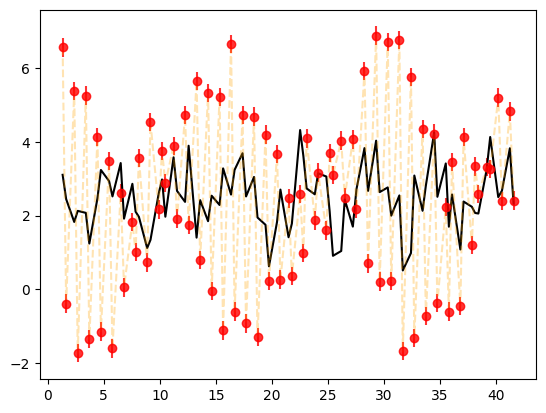

In [167]:
def fittedcurve(x,a,b,c,d,e,f):
    return np.cos(np.sin(a*x)*x+c)+np.cos(b*x)+d
#   return h*np.cos(a*x)*np.sin(b*x+c)+d*np.cos(e*x+f)+g
    # return b*np.cos(c*x+d)*e*np.sin(f*x+g)+h*np.sin(i*x+j)+k
   # return a*(b*(c*np.sin(d*np.cos(e*x+f)*x+g)+h*np.sin(i*x+j))+k)+l


date=np.array(date)
height=np.array(height)
params, cov = curve_fit(fittedcurve,date,height,maxfev=10000) #fits curve to function fittedcurve()
fv=np.zeros(len(params)) #creates empty array fv[] (fitted values) where each element is the fitted value of a,b,c,d... respective to index

for i in range(len(params)):
    fv[i]=params[i]
print(fv)


fit = fittedcurve(date,*params) #*params unpacks the params[] list generated by curve_fit(), equivalent to: fv[0]*(fv[1]*np.sin(fv[2]*np.cos(fv[3]*x+fv[4])*x+fv[5])+fv[6]*np.sin(fv[7]*x+fv[8]))+fv[9]
plt.errorbar(date,height,yerr=heighterr,color='red',alpha=0.8,fmt='o')
plt.plot(date,fit,color='black')
plt.plot(date,height,color='orange',linestyle='dashed',alpha=0.3)

#create axes and figure instead of doing it this way, work on plot styling^^^
